# Assignment 7: reference solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

## Define data

In [2]:
N = 51
sigma = 1.15

X = np.random.uniform(-4, 4, size = (N, 1))
y = np.random.normal(0, sigma, size = N) + X.ravel() ** 2

## Make functions for validation set approach and k-fold cross validation approach

In [3]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [4]:
def validation_set(model, X, y, n):
    X_train = X[:n,:]
    y_train = y[:n]
    X_val = X[n:,:]
    y_val = y[n:]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    val_error = np.mean(np.abs(y_val - predictions))
    
    return val_error
    
    

In [5]:
def k_fold_cv(model, X, y, k_folds):
    folds = np.array_split(np.hstack((X, y.reshape(-1,1))), k_folds)
    errors = []
    for i in range(k_folds):
        X_val = folds[i][:,0].reshape(-1,1)
        y_val = folds[i][:,1]
        
        folds_train = [fold for j, fold in enumerate(folds) if j!=i]
        folds_train = np.concatenate(folds_train, axis=0)
        X_train = folds_train[:,0].reshape(-1,1)
        y_train = folds_train[:,1]
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_val)
        errors.append(np.mean(np.abs(y_val - predictions)))
    cval_error = sum(errors)/len(errors)
    
    return cval_error

## Compute generalization error by all three methods (for neighborhood size k ranging from 1 to 20)

In [8]:
k_list = np.arange(20, 1, -1)

val_errors_sup = []
LOOCV_errors_sup = []
k_fold_cv_errors_sup = []

for i in range(5):
    val_errors = []
    k_fold_cv_errors = []
    LOOCV_errors = []
    X_shuffled, y_shuffled = unison_shuffled_copies(X, y)
    
    for k in k_list:
        model = KNeighborsRegressor(n_neighbors = k)
        val_errors.append(validation_set(model=model, X=X_shuffled, y=y_shuffled, n=40))
        k_fold_cv_errors.append(k_fold_cv(model=model, X=X_shuffled, y=y_shuffled, k_folds=10))
        LOOCV_errors.append(k_fold_cv(model=model, X=X_shuffled, y=y_shuffled, k_folds=len(X)))
    
    val_errors_sup.append(val_errors)
    k_fold_cv_errors_sup.append(k_fold_cv_errors)
    LOOCV_errors_sup.append(LOOCV_errors)
    

## Plot errors

[]

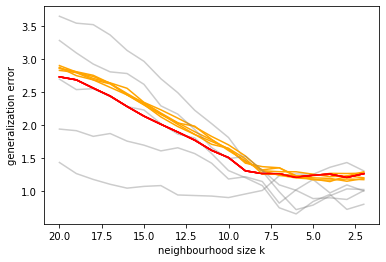

In [10]:
fig, ax = plt.subplots()
for i in range(5):
    ax.plot(k_list, val_errors_sup[i], color='grey', alpha=0.4, label='validation set')
    ax.plot(k_list, k_fold_cv_errors_sup[i], color='orange', label='K-fold CV')
    ax.plot(k_list, LOOCV_errors_sup[i], color='red', label='LOOCV')

ax.invert_xaxis()
#plt.legend()
plt.ylabel('generalization error')
plt.xlabel('neighbourhood size k')
plt.plot()
